# Multiple Linear Regression from scratch using Gradient Descent

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


In [2]:
data = pd.read_csv('/home/shon/Desktop/regression/score.csv',sep=',')

In [3]:
data.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [5]:
math = data['Math'].values

In [6]:
read = data['Reading'].values

In [7]:
write = data['Writing'].values

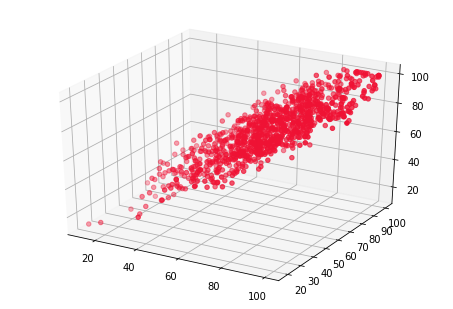

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [8]:
n=len(math)

In [9]:
x0=np.ones(n)

In [10]:
X = np.array([x0, math, read]).T

In [11]:
print(X)

[[ 1. 48. 68.]
 [ 1. 62. 81.]
 [ 1. 79. 80.]
 ...
 [ 1. 89. 87.]
 [ 1. 83. 82.]
 [ 1. 66. 66.]]


In [12]:
W = np.array([0,0,0])

In [13]:
Y = np.array(write)

In [14]:
learn = 0.0001

In [18]:
def cost_func(X, Y, W):
    m = len(Y)
    cost = np.sum((X.dot(W)-Y) ** 2)/(2*m)
    return cost

In [19]:
initial_cost = cost_func(X, Y, W)

In [20]:
print(initial_cost)

2470.11


In [25]:
def gradient_descent(X, Y, W, learn, iterations):
    cost_history = [0]*iterations
    n = len(Y)
    
    for i in range(iterations):
        Y_pred = X.dot(W)
        
        loss = Y_pred - Y
        gradient = X.T.dot(loss)/n
        
        W = W - learn * gradient
        
        cost = cost_func(X, Y, W)
        cost_history[i]= cost
    
    return W , cost_history

In [26]:
new_W, cost_history = gradient_descent(X, Y, W, learn, 100000)

In [27]:
print(new_W)

[-0.47889172  0.09137252  0.90144884]


In [29]:
print(cost_history[-1])

10.475123473539169


In [31]:
def rmse(X, Y, new_W):
    Y_prep = X.dot(new_W)
    
    rmse = np.sqrt(sum((Y-Y_prep)**2)/len(Y))
    return rmse

In [32]:
print(rmse(X,Y, new_W))

4.577143972727789
